In [109]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from sklearn.preprocessing import LabelEncoder

In [110]:
df = pd.read_csv(r"F:\Self Learning\Code_basics_projects\Sentiment Analysis Dataset\sentimentdataset.csv")
df.sample(2)

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
597,Attended a concert and danced the night away. ...,Joy,6/6/2023 22:30,DanceEnthusiast,Facebook,#MusicMagic #TeenConcert,28,55,Canada,2023,6,6,22
88,Disappointed with the lack of progress in a p...,Disappointed,2/25/2023 9:00,ProjectStruggle,Twitter,#Disappointed #Project,18,35,India,2023,2,25,9


In [111]:
df.shape

(732, 13)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       732 non-null    object
 1   Sentiment  732 non-null    object
 2   Timestamp  732 non-null    object
 3   User       732 non-null    object
 4   Platform   732 non-null    object
 5   Hashtags   732 non-null    object
 6   Retweets   732 non-null    int64 
 7   Likes      732 non-null    int64 
 8   Country    732 non-null    object
 9   Year       732 non-null    int64 
 10  Month      732 non-null    int64 
 11  Day        732 non-null    int64 
 12  Hour       732 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 74.5+ KB


In [113]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [114]:
df.columns.value_counts().sum()

13

In [115]:
y = df.pop("Sentiment")
df.insert(12, "Sentiment", y)

In [116]:
df.sample(2)

,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment
129,Compassion towards those in need during the h...,2015-12-22 14:20:00,HolidayHelper,Facebook,#Compassion #HolidaySupport,18,35,USA,2015,12,22,14,Compassion
107,Pride in accomplishing personal and professio...,2023-03-03 14:30:00,GoalAchiever,Instagram,#Pride #Accomplishments,12,25,Canada,2023,3,3,14,Pride


In [117]:
df.isnull().sum()

Text         0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
Sentiment    0
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Timestamp  732 non-null    datetime64[ns]
 2   User       732 non-null    object        
 3   Platform   732 non-null    object        
 4   Hashtags   732 non-null    object        
 5   Retweets   732 non-null    int64         
 6   Likes      732 non-null    int64         
 7   Country    732 non-null    object        
 8   Year       732 non-null    int64         
 9   Month      732 non-null    int64         
 10  Day        732 non-null    int64         
 11  Hour       732 non-null    int64         
 12  Sentiment  732 non-null    object        
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 74.5+ KB


In [119]:
df.head()

,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Sentiment
0,Enjoying a beautiful day at the park! ...,2023-01-15 12:30:00,User,Twitter,#Nature #Park,15,30,USA,2023,1,15,12,Positive
1,Traffic was terrible this morning. ...,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8,Negative
2,Just finished an amazing workout! 💪 ...,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15,Positive
3,Excited about the upcoming weekend getaway! ...,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18,Positive
4,Trying out a new recipe for dinner tonight. ...,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19,Neutral


In [120]:
df = df[["Platform", "Hashtags", "Retweets", "Likes", "Country", "Year", "Month","Day", "Hour", "Sentiment"]]

In [121]:
from sklearn.feature_selection import SelectKBest, chi2,f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

#import dimensionality reduction libraries
from sklearn.decomposition import PCA

#import algorithm libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [122]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

s = (df.dtypes == 'object')
object_cols = list(s[s].index)

data_copy = df.copy()
le = LabelEncoder()
for col in object_cols:
    data_copy[col] = le.fit_transform(data_copy[col].astype(str))

x = data_copy.drop("Sentiment", axis=1)
Y = data_copy[["Sentiment"]]

bestfeatures = SelectKBest(score_func=chi2, k=9)
dfit = bestfeatures.fit(x, Y)

df_scores = pd.DataFrame(dfit.scores_, columns=['Score'])
df_cols = pd.DataFrame(x.columns, columns=['Feature'])

feature_importance = pd.concat([df_cols, df_scores], axis=1)

feature_importance.columns = ['Feature', 'Score']

print(feature_importance.nlargest(9, 'Score'))

    Feature         Score
1  Hashtags  59508.259508
4   Country   7677.746856
3     Likes   2398.226707
7       Day   1502.066149
2  Retweets   1207.688861
6     Month    977.690611
8      Hour    521.744363
0  Platform    278.040389
5      Year      2.184326


In [123]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=9)
dfit = bestfeatures.fit(x,Y)
df_scores = pd.DataFrame(dfit.scores_, columns=['Score'])
df_cols = pd.DataFrame(x.columns, columns=['Feature'])

# now we will concatenate the 2 dataframes
feature_importance = pd.concat([df_cols, df_scores],axis=1)
feature_importance.columns = ['Feature','Score']
print(feature_importance.nlargest(9,'Score'))

    Feature     Score
5      Year  5.419298
2  Retweets  4.041203
3     Likes  3.969767
1  Hashtags  3.963935
6     Month  3.866964
8      Hour  3.090337
7       Day  1.298080
4   Country  1.290564
0  Platform  1.129567


c:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(x)

MinMaxScaler()

In [125]:
x = sm.add_constant(x)
model = sm.OLS(Y, x).fit()

In [126]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     124.3
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.80e-140
Time:                        21:58:47   Log-Likelihood:                -3843.7
No. Observations:                 732   AIC:                             7707.
Df Residuals:                     722   BIC:                             7753.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -346.6172   1322.280     -0.262      0.7

In [127]:
p_values = model.pvalues

significance_threshold = 0.05

# Filter out non-significant features
significant_features = p_values[p_values < significance_threshold].index

print("Significant Features:")
print(significant_features)

Significant Features:
Index(['Hashtags', 'Retweets', 'Likes', 'Month'], dtype='object')


In [128]:
import statsmodels.api as sm

selected_features = ['Hashtags', 'Retweets', 'Likes', 'Month']
X_selected = x[selected_features]

# Add a constant term to the independent variables matrix
X_selected = sm.add_constant(X_selected)

model_selected = sm.OLS(Y, X_selected).fit()

print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     279.2
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.72e-145
Time:                        21:58:47   Log-Likelihood:                -3845.5
No. Observations:                 732   AIC:                             7701.
Df Residuals:                     727   BIC:                             7724.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.1842      6.711      7.329      0.0

# Now we will bw checking the OLS assumption to know that whether we can use the regression model or not.

In [129]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import statistics

***Jarque Bera Test***

* Null Hypothesis: Data is normally distributed.
* Alternate Hypothesus: Data is not normally distributed.

In [130]:
stats.jarque_bera(X_selected)

SignificanceResult(statistic=6360.796177193471, pvalue=0.0)

In [131]:
stats.jarque_bera(model_selected.resid)

SignificanceResult(statistic=284.4568077511669, pvalue=1.7021155014622448e-62)

***From the above code, we can say that the residuals are not normal in our case. Now we are going to do some more test on the residuals***

***Augmented Dickey Fuller***

* Null Hypothesis: There is unit root.
* Alternate Hypothesis: There is no unit root.

In [132]:
st.adfuller(model_selected.resid)

(-3.7604623553685648,
 0.0033387534107711288,
 19,
 712,
 {'1%': -3.4395677423210493,
  '5%': -2.8656078730509784,
  '10%': -2.5689362152032573},
 7386.04601665344)

***From the above adfuller test, we get p value < 0.05, so we reject the null hypothesis and accept the alternate hypothesis saying that the residuals does not have unit roots and hence our data is stationary and we can say that the data is normal***

***Correlogram Test***

* Null hypothesis: Data is not auto-correlated.
* Alternate hypothesis: Data is auto-correlated.

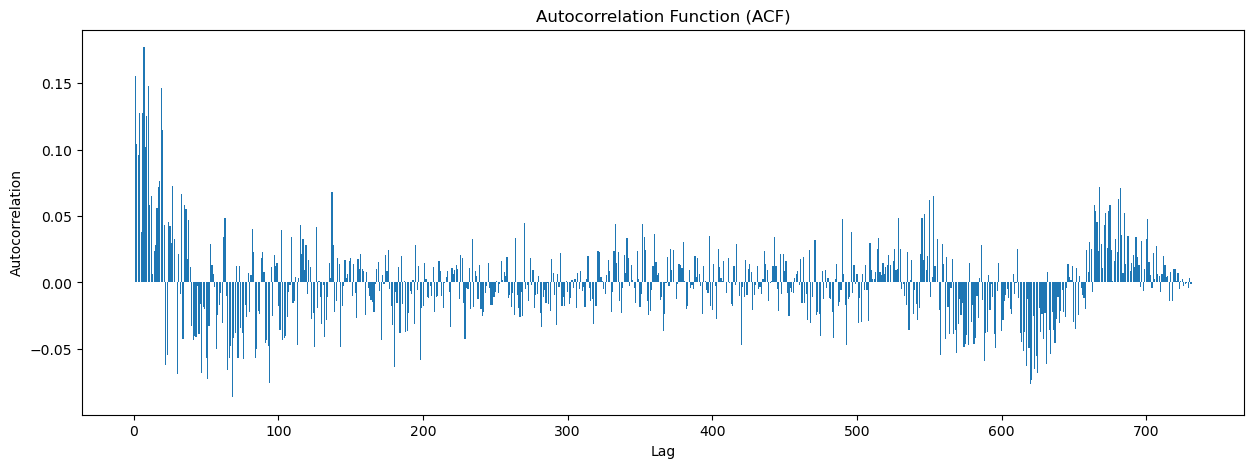

Ljung-Box Q-statistic: [  17.68035613   25.68710505   32.50633849   44.53835411   45.61355096
   57.62789105   80.83465359   88.50414068  100.17331073  116.50566236
  119.01212666  122.19743545  122.22500484  122.65485606  123.2472129
  125.61995077  129.51576917  133.90526814  150.02565366  159.97440888
  161.3963728   164.34238366  166.60433997  168.1532673   169.53569666
  170.18943431  174.16488295  174.98156974  174.98157841  178.58409669
  178.93461801  178.99646808  182.417156    183.81790935  186.41920724
  188.76322777  189.00239448  190.70183476  190.80394376  191.62699882
  193.0646589   194.32381778  195.6292324   195.63468995  196.80899419
  197.01936339  200.67439649  200.94993092  201.25354928  203.77798899
  207.94012005  208.78592728  209.43556462  209.56403377  209.59308306
  209.60321883  211.58740705  212.06096555  212.28464631  212.33390127
  213.07447955  214.00636755  215.90649257  215.99366174  219.46640052
  222.04586519  223.88066206  229.91883154  231.3315279

In [133]:
lags = len(model_selected.resid[1:1000])
acf, q_stat, p_values = sm.tsa.acf(model_selected.resid, nlags=lags, qstat=True)

plt.figure(figsize=(15,5))
plt.bar(range(1, lags+1), acf[1:])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Print Ljung-Box test results
print('Ljung-Box Q-statistic:', q_stat)
print('P-values for Ljung-Box test:', p_values)

***From the above correlogram test we can say that the probality value is lesser then 0.05 significance level hence we can reject the null hypothesis and accept the alternate hypothesis, which states that the residuals are auto-coreelated or partially auto-coreelated***

***Durbin Watson Test***

In [134]:
sm.stats.durbin_watson(model_selected.resid)

1.684926696335385

# Heteroscedasticity Test

***White Test***

* Null hypothesis: Data is not Heteroscedastic.
* Alternate hypothesis: Data is Heteroscedastic.

In [135]:
lm, lm_pvalue, f_stats, f_stats_pvalue = sm.stats.diagnostic.het_white(model_selected.resid, x)
print("lm value: {}\nlm pvalue: {}\nf_stats value: {}\nf_stats_pvalues: {}".format(lm_pvalue, f_stats, f_stats, f_stats_pvalue))

lm value: 2.3719476723447792e-20
lm pvalue: 5.062350168501059
f_stats value: 5.062350168501059
f_stats_pvalues: 5.762079413793562e-25


***In the above test for Heteroscedasticity, we have enough evidence to reject the null hypothesis and accepting the alternate hypothesis saying that the data is hetereoscedastic. we came to know that the data is hestroscedastic and hence we cannot not move forward without dealing with this kind of issue.***

***BPG-Test: Breuch Pagan Godfrey Test***

* Null hypothesis: Data is not Heteroscedastic.
* ALtered hypothesis: Data is Heteroscedastic.

In [136]:
sm.stats.het_breuschpagan(model_selected.resid, x)

(94.46660429422779,
 2.0594003717388768e-16,
 11.886939528682728,
 1.407787661855568e-17)

***Glejser Test***

* Null hypothesis: Data is not Heteroscedastic.
* Altered hypothesis: Data is Heteroscedastic.

In [137]:
sm.stats.het_goldfeldquandt(model_selected.resid, x)

(1.9220190229990768, 5.103312842446652e-10, 'increasing')

# Multicollinearity Test

***VIF Test***

In [138]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

   Variable            VIF
0     const  592619.310219
1  Platform       1.032869
2  Hashtags       1.037591
3  Retweets     342.737655
4     Likes     342.264928
5   Country       1.015263
6      Year       1.135843
7     Month       1.181320
8       Day       1.034784
9      Hour       1.099399


***From the above VIF test, we can say that the there is no multicollinearity among the independent variables except for the variables Retweets and Likes, these both independents values are greater than 1. Hence, we can say that the Retweets and Likes are multicollinearity among the independent variables.***

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 34.51950177302407
Mean Squared Error: 2427.740423294319
R-squared: 0.5115421086841809


In [140]:
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score
r2_score = clf.score(X_test, y_test)
r2_score

0.646926770880393

In [141]:
import statsmodels.api as sm

selected_features = ['Hashtags', 'Retweets', 'Likes', 'Month']
X_selected = x[selected_features]

# Add a constant term to the independent variables matrix
X_selected = sm.add_constant(X_selected)

model_selected = sm.OLS(Y, X_selected).fit()

print(model_selected.summary())

                            OLS Regression Results                            
Dep. Variable:              Sentiment   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     279.2
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          2.72e-145
Time:                        21:58:49   Log-Likelihood:                -3845.5
No. Observations:                 732   AIC:                             7701.
Df Residuals:                     727   BIC:                             7724.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.1842      6.711      7.329      0.0

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2)

clf = LinearRegression()

clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

In [143]:
clf.intercept_

array([-1594.96827124])

In [144]:
clf.coef_

array([[ 0.        , -1.0312992 ,  0.29188912, -6.46798256,  3.15266972,
         0.06180916,  0.80618374, -1.01986226,  0.18354852,  0.56934911]])

In [145]:
y_hat

array([[161.72801981],
       [138.80000803],
       [ 60.71076621],
       [108.66058896],
       [148.9831079 ],
       [184.01957003],
       [105.73341208],
       [239.33354438],
       [ 81.12177282],
       [184.37978476],
       [ 43.60517055],
       [230.96577716],
       [ 76.00486293],
       [195.94231589],
       [176.05623455],
       [ 83.88573341],
       [122.75902365],
       [148.1684056 ],
       [146.8165523 ],
       [ 71.01438462],
       [192.62304872],
       [227.36421078],
       [ 50.23625112],
       [167.74379404],
       [216.2709106 ],
       [111.53720021],
       [128.37406207],
       [157.02305436],
       [ 47.93692191],
       [ 55.15237116],
       [136.21206945],
       [ 43.13621264],
       [221.39122925],
       [220.01337438],
       [177.34458355],
       [ 82.56113112],
       [224.71870385],
       [135.85225934],
       [184.77331829],
       [ 68.24117572],
       [236.29193525],
       [133.0659854 ],
       [ 92.89857645],
       [241